#                       Machine Learning Algorithm on Iris 

# -------------------------Data Analysis Phase--------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(df.shape)        # No of rows=150 ,No of columns=6

(150, 6)


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Finding  Features with Missing Values

In [7]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
if len(features_with_na)==0:
    print(0)
else:
    for feature in features_with_na:
        print(feature)

0


# Analysing Numerical Features

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
if numerical_features :
    for feature in numerical_features:
        print(feature,end=" ")
else:
    print(0)

SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm 

In [9]:
# Dropping Id Column
df.drop(['Id'],inplace=True,axis=1)

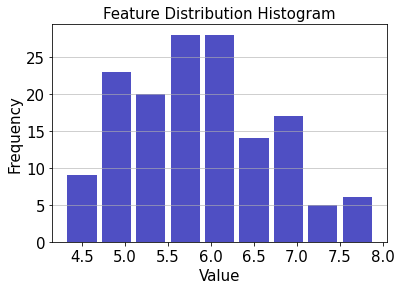

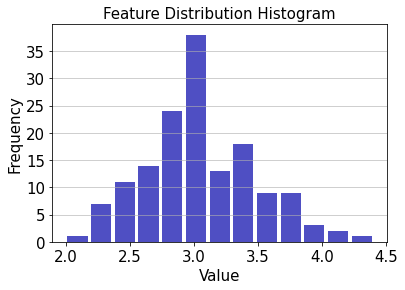

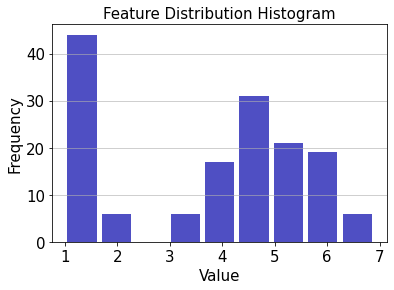

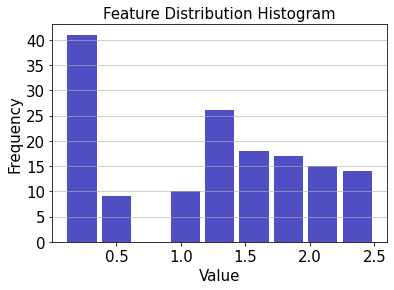

In [12]:
for feature in numerical_features:             # Histogram
    # Histogram using matplotlib
    plt.figure(figsize=[6,4])
    n, bins, patches = plt.hist(x=df[feature], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Feature Distribution Histogram',fontsize=15)
    plt.show()

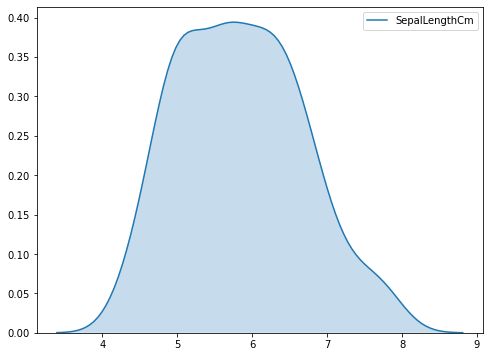

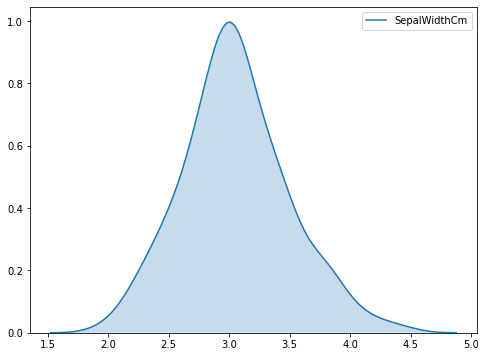

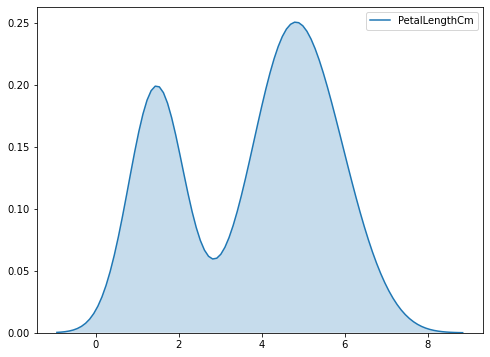

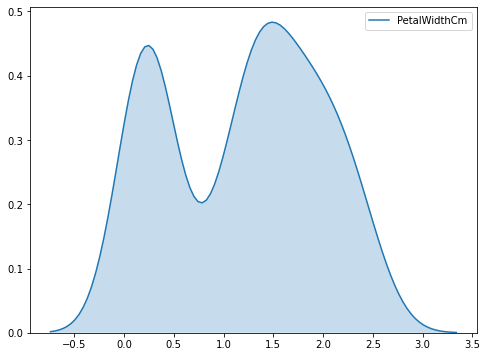

In [13]:
for feature in numerical_features:             # The Kde Plot
    plt.figure(figsize=[8,6])
    sns.kdeplot(data=df[feature],shade=True)

Text(0.5, 1.0, 'SepalLengthCm')

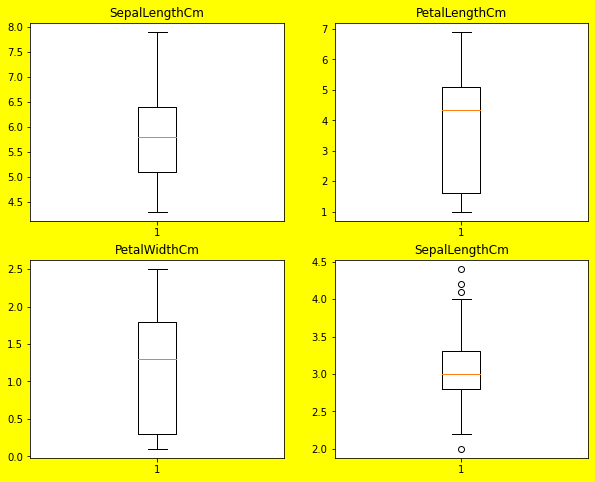

In [14]:
# lOOKING FOR THE OUTLIERS Using Box Plot
fig, axs = plt.subplots(2, 2,figsize=[10,8],facecolor='yellow')
axs[0,0].boxplot(df['SepalLengthCm'])
axs[0,0].set_title('SepalLengthCm')
axs[0,1].boxplot(df['PetalLengthCm'])
axs[0,1].set_title('PetalLengthCm')
axs[1,0].boxplot(df['PetalWidthCm'])
axs[1,0].set_title('PetalWidthCm')
axs[1,1].boxplot(df['SepalWidthCm'])
axs[1,1].set_title('SepalLengthCm')

There are outliers in case of SepalLengthCm.
The Decision Tree Algorithm is not sensitive to outliers

# ------------------------------------Modelling-------------------------------------------------------------

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [35]:
x_train=df.iloc[:,0:4]
y_train=df['Species']
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
cls=DecisionTreeClassifier()
score=cross_val_score(cls,x_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)cr

[1.         1.         0.93333333 0.8        1.         1.
 0.93333333 0.93333333 0.93333333 0.93333333]


In [37]:
round(np.mean(score)*100,2)

94.67

In [38]:
cls.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Let's do HyperParameter Optimization

In [41]:
param_dist={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,None]}

In [43]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(cls,param_grid=param_dist,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [44]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
grid.best_score_

0.96

In [46]:
cls=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [47]:
cls.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Let's Visualise The Decision Tree

[Text(313.875, 475.65000000000003, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(209.25, 339.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(418.5, 339.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(209.25, 203.85000000000002, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(104.625, 67.94999999999999, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(313.875, 67.94999999999999, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(627.75, 203.85000000000002, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(523.125, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(732.375, 67.94999999999999, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

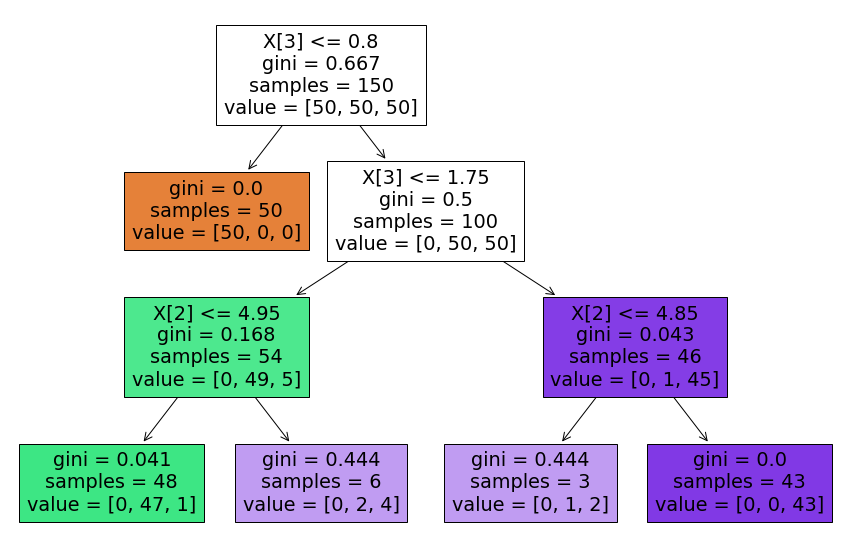

In [48]:
from sklearn import tree
plt.figure(figsize=[15,10])
tree.plot_tree(cls,filled=True)